In [1]:
#importing necessary modules

import tensorflow as tf
import keras
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt


Using TensorFlow backend.


In [19]:
# importing dataset and y values (as one_hot encoded)
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
#checking the training  and testing data

mnist.train.images.shape,mnist.train.images.shape


((55000, 784), (55000, 784))

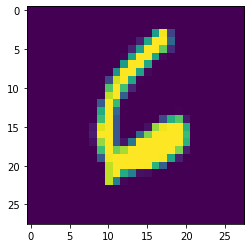

In [4]:
#plotting a image

first_image=mnist.train.images[3]
first_image=np.array(first_image)
first_image=first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [5]:
#initializing number of units and number of hidden layers

n_input=784
h1_unit=1024
h2_unit=1024
#h3_unit=1024
out_unit=10


In [6]:
# initializing weights for all the layers

weights={
    'h1':tf.Variable(tf.random_normal([n_input,h1_unit])),
    'h2':tf.Variable(tf.random_normal([h1_unit,h2_unit])),
    #'h3':tf.Variable(tf.random_normal([h2_unit,h3_unit])),
    'out':tf.Variable(tf.random_normal([h2_unit,out_unit]))
}

In [7]:
#initializing biases for all the layers

biases={
    'h1':tf.Variable(tf.random_normal([h1_unit])),
    'h2':tf.Variable(tf.random_normal([h2_unit])),
    #'h3':tf.Variable(tf.random_normal([h3_unit])),
    'out':tf.Variable(tf.random_normal([out_unit]))
}

In [8]:
#code for forward propagation where we are getting output from the input,weights,biases

def forward_propagation(x,weights,biases):
    input_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    output_layer1=tf.nn.relu(input_layer1)
    
    
    input_layer2=tf.add(tf.matmul(output_layer1,weights['h2']),biases['h2'])
    output_layer2=tf.nn.relu(input_layer2)
    
    #input_layer3=tf.add(tf.matmul(output_layer2,weights['h3']),biases['h3'])
    #output_layer3=tf.nn.relu(input_layer3)
    
    #here activation function is relu
    output=tf.add(tf.matmul(output_layer2,weights['out']),biases['out'])
    
    return output

In [9]:
# defining x,y as tensorflow placeholder

x=tf.placeholder("float",[None,n_input])
y=tf.placeholder(tf.int32,[None,out_unit])


In [10]:
#getting the output from the initialized values

pred=forward_propagation(x,weights,biases)

In [11]:
# predicting the digit by taking the index of the max_value and finding the correct_labels

prediction=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_labels = tf.equal(prediction,true_labels)

In [20]:
# defining the cost and optimizer based on the predictions and actual_labels using cross-entropy function and Adam optimizer

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

In [13]:
# initializing tensorflow session and variables

sess=tf.Session()
sess.run(tf.global_variables_initializer())


In [14]:
# Running the optimizer for multiple iteration to optimize the cost and training weights on train data in batches
batch_size=100
for i in range(25):
    num_batches=int(mnist.train.num_examples/batch_size)
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost)

112857.65320205688
16495.8506823653
10180.408734896639
7435.993866468626
5188.3811212669625
5472.610112154402
5365.099488924004
4054.917836731376
3234.9046839749844
3974.5846232845333
2980.4644537619806
3119.755534766165
2500.2023965716958
2229.8873982303094
2248.26427572449
2339.4791803532
2331.543848417154
1589.0537672543144
1551.8138735732641
1936.5359497629736
1253.923818442218
1707.2216033873624
1135.8297762663333
1305.523528631239
1413.65942113764


In [15]:
# Running the optimizer for multiple iteration to optimize the cost and training weights on train data

#for i in range(25):
   # c,_=sess.run([cost,optimize] , feed_dict = {
    #x:mnist.train.images,
    #y:mnist.train.labels
    #} )
    #pred=forward_propagation(x,weights,biases)
    
    #prediction=tf.argmax(pred,1)
    #true_labels=tf.argmax(y,1)
    #correct_labels = tf.equal(prediction,true_labels)
    
    #my_digits,true_digits,pred_eval=sess.run([prediction,true_labels,correct_labels] , feed_dict = {
    #x:mnist.train.images,
    #y:mnist.train.labels
    #} )
    #print(100*(pred_eval.sum()/mnist.train.images.shape[0]))


In [16]:
# Finding the predictions and accuracy on the test data

pred=forward_propagation(x,weights,biases)
prediction=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_labels = tf.equal(prediction,true_labels)
my_digits,true_digits,pred_eval=sess.run([prediction,true_labels,correct_labels] , feed_dict = {
    x:mnist.test.images,
    y:mnist.test.labels
    } )
pred_eval.sum()/mnist.test.images.shape[0]

0.9711

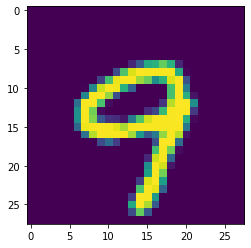

In [17]:
#plotting a testing image from the test data 

first_image=mnist.test.images[58]
first_image=np.array(first_image)
first_image=first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()


In [18]:
#checking the above image value from the predicitions of our neural network
my_digits[58]

9